In [1]:
%matplotlib notebook
import numpy as np, matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from points import *
from LS import *
from scipy.spatial.transform import Rotation as R
from numpy import pi as π
from matplotlib import cm

plt.rcParams["font.family"] = "Lucida Grande"
plt.rcParams["font.size"] = 16
plt.style.use("ggplot")

# Silly hacks for avoiding singular points and not showing rotation matrix warnings
zero = 1e-3
import warnings
warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>


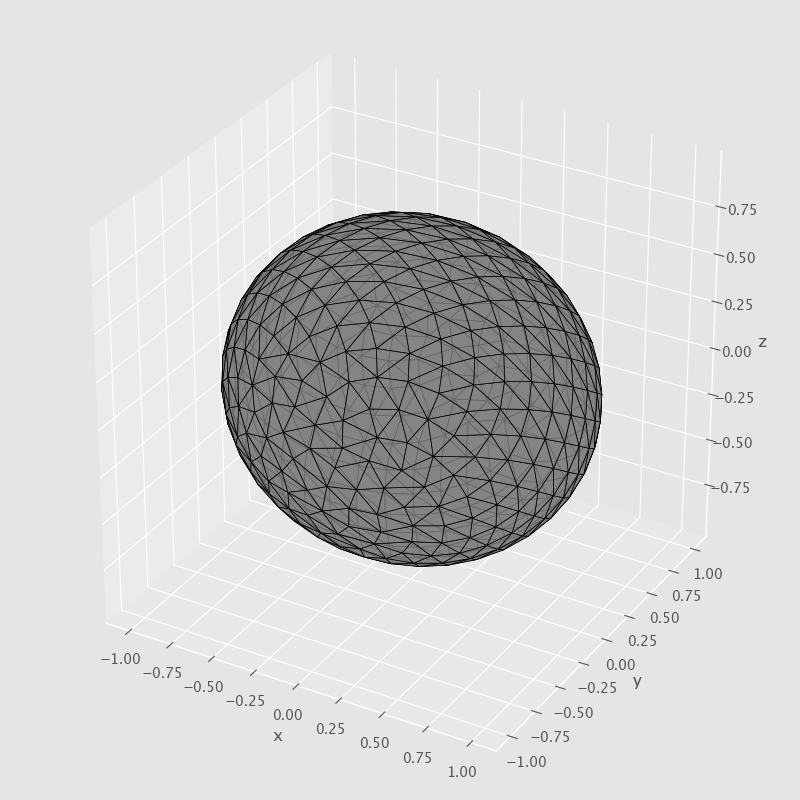

In [2]:
a = 1
b = 0.86
c = 0.82
n = 500

#P, T = genellip(c, a, b, n, sigma = 0.125, ell = 0.3, gid = 1)  
#T, N, C = surface_normals(P, T)
#fig = plot_mesh(P, T, C, N)

P, T, N, C = ellipsoid_points(a, b, c, n)
fig = plot_mesh(P, T, C, N)


In [3]:
φ = np.linspace(0,2*π,10)
α = np.linspace(0,π,10)

Φ = np.zeros([α.size,φ.size])

for j, fi in enumerate(φ):
    print((j+1),'/',φ.size)
    for i, ai in enumerate(α):
        Φ[i,j] = Φ_LS_n(N, ai, φ=fi)

1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10


<IPython.core.display.Javascript object>


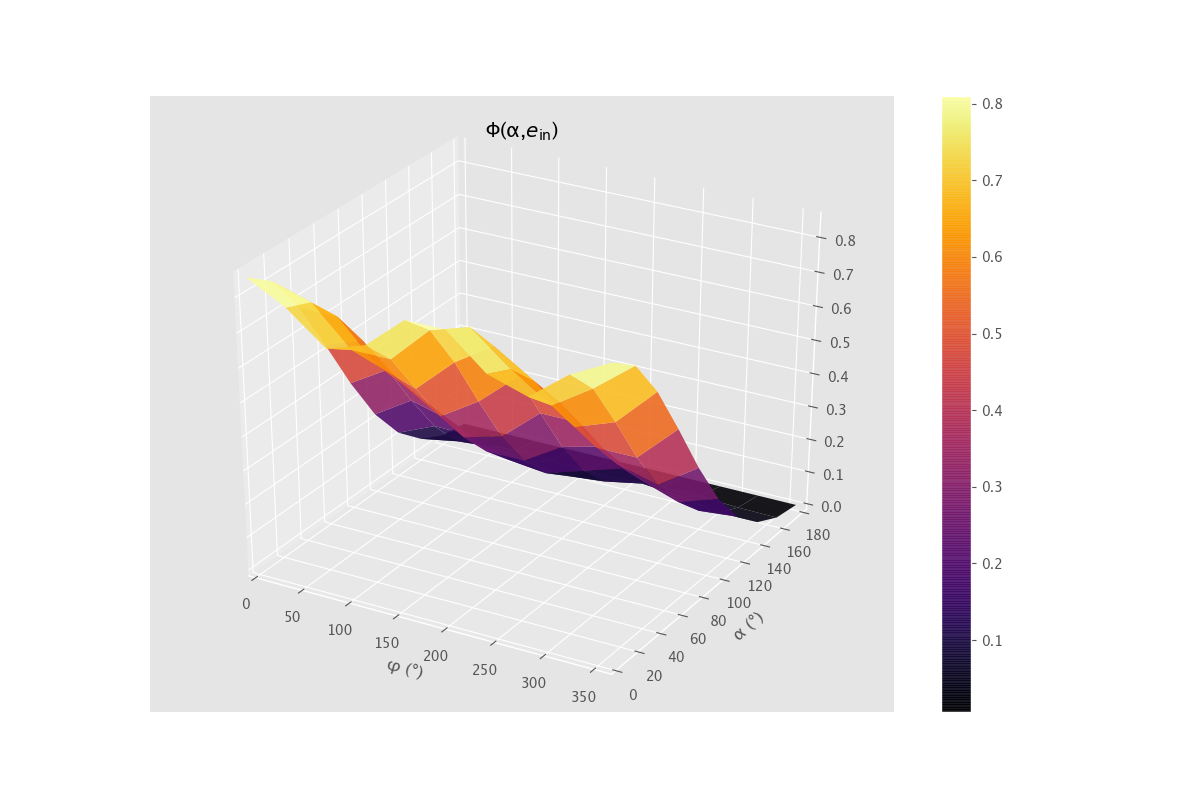

In [4]:
X, Y = np.meshgrid(φ*180/π,α*180/π)
fig = plt.figure(figsize=(12,8))

ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Φ, cmap=cm.inferno, linewidth=0, antialiased=True,alpha=0.9)

plt.ylabel('α (°)')
plt.xlabel('φ (°)')
plt.title(r'Φ(α,$e_\mathrm{in}$)')
plt.xlim([0,360])
plt.ylim([0,180])
plt.colorbar(surf)
plt.show()

<IPython.core.display.Javascript object>


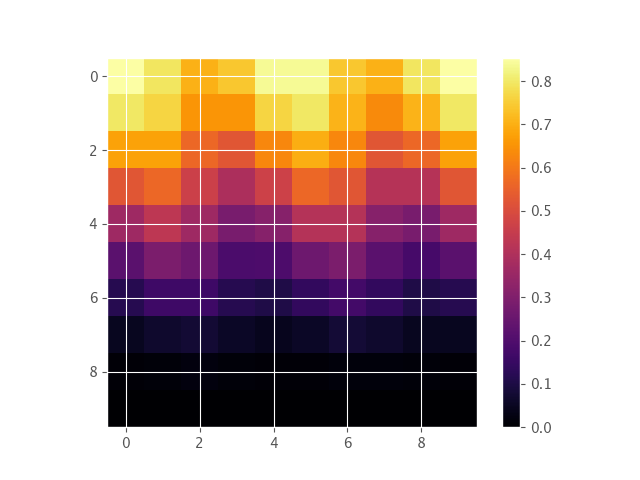

In [5]:
fig = plt.figure()
plt.imshow(Φ,cmap=cm.inferno)
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


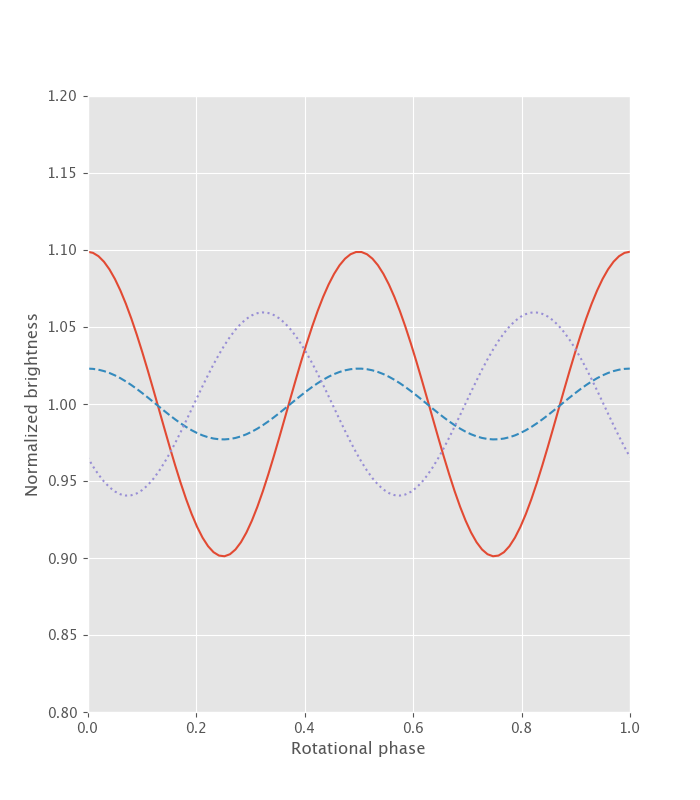

In [6]:
# Test that the bottom left subfigure of Fig. 1 of
# Muinonen & Lumme (2015) is reproduced
a = 1; b = 0.86; c = 0.82
φ = np.linspace(0,2*π,100)
L1 = np.zeros(φ.size)
L2 = np.zeros(φ.size)
L3 = np.zeros(φ.size)

# Here, λ is longitude, 90 deg - β is latitude and φ is the rotational phase
for i, fi in enumerate(φ):
    L1[i] = Φ_LS_a(a,b,c,α=0,β=0,λ=0,φ=fi)
    L2[i] = Φ_LS_a(a,b,c,α=0,β=60*π/180,λ=0,φ=fi)
    L3[i] = Φ_LS_a(a,b,c,α=0,β=60*π/180,λ=45*π/180,φ=fi)

fig = plt.figure(figsize=(7,8))
plt.plot(φ/(2*π), L1/(0.5*(np.amax(L1)+np.amin(L1))))
plt.plot(φ/(2*π), L2/(0.5*(np.amax(L2)+np.amin(L2))),'--')
plt.plot(φ/(2*π), L3/(0.5*(np.amax(L3)+np.amin(L3))),':')
plt.xlim([0,1])
plt.ylim([0.8,1.2])
plt.xlabel('Rotational phase')
plt.ylabel('Normalized brightness')
plt.show()

In [9]:
# Use the YX'Y''- intrinsic rotation notation, where following angles 
# are in corresponding order
λ = np.linspace(0, 2*π, 10)
β = np.linspace(0, π, 10)
φ = np.linspace(0, 2*π, 10)
α = np.linspace(0, π ,30)

a = 1; b = 0.86; c = 0.82
φ = np.linspace(0,2*π,100)
L1 = np.zeros(φ.size)
L2 = np.zeros(φ.size)
L3 = np.zeros(φ.size)

P, T, N, C = ellipsoid_points(a, b, c, 500)
# Here, γ is longitude, 90 deg - β is latitude and αp is the rotational phase
for i, fi in enumerate(φ):
    if np.mod(i,9)==0: print(i+1)
    L1[i] = Φ_LS_n(N, α=0,φ=fi,β=0,λ=0)
    L2[i] = Φ_LS_n(N, α=0,φ=fi,β=60*π/180,λ=0)
    L3[i] = Φ_LS_n(N, α=0,φ=fi,β=60*π/180,λ=45*π/180)

1
10
19
28
37
46
55
64
73
82
91
100


<IPython.core.display.Javascript object>


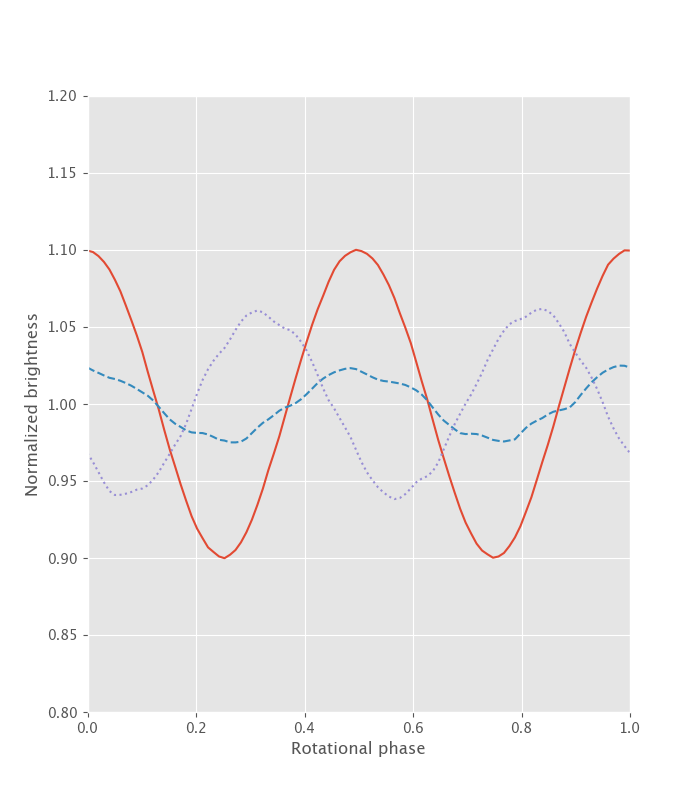

In [8]:
fig = plt.figure(figsize=(7,8))
plt.plot(φ/(2*π), L1/(0.5*(np.amax(L1)+np.amin(L1))))
plt.plot(φ/(2*π), L2/(0.5*(np.amax(L2)+np.amin(L2))),'--')
plt.plot(φ/(2*π), L3/(0.5*(np.amax(L3)+np.amin(L3))),':')
plt.xlim([0,1])
plt.ylim([0.8,1.2])
plt.xlabel('Rotational phase')
plt.ylabel('Normalized brightness')
plt.show()